# **PROBLEMA DE NEGOCIO**


---




##Una plataforma de streaming para el hogar, con presencia en todo el mundo, necesita impulsar su rendimiento utilizando datos de tendencias en el sector de manera estratégica. Como científico de datos especializado en la industria del entretenimiento, has sido convocado para analizar estos datos y ofrecer insights que guíen sus decisiones y respondan a las siguientes preguntas clave:

### **Preguntas**

1. ¿Cual es la evolución del rating por tipo de contenido?

2. ¿Cual es el rating promedio por género?

3. ¿Cuáles son los géneros que proporcionan mayor ROI?

4. ¿Cuáles son los países con mayor producción de contenido?

5. ¿Cual es tu recomendación para el cliente?

# **1. Configuración del Ambiente**


---




In [1]:
import warnings
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format)
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import dask.dataframe as dd
from google.colab import drive
from matplotlib.ticker import FuncFormatter, MaxNLocator
drive.mount('/content/drive')
global df_title_basics,df_title_ratings,df_tmdb


Mounted at /content/drive


# **2. Obtención, Tratamiento y Análisis Exploratório (EDA)**


---




## **2.1 Cargando las bases de datos**

In [2]:
df_title_basics = dd.read_csv(r'/content/drive/MyDrive/CSV/Junio24/archive/title.basics.tsv', dtype={'isAdult': 'object', 'runtimeMinutes': 'object', 'startYear': 'object'}, delimiter='\t', low_memory=False)
df_title_basics.head(10)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,5,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"
5,tt0000006,short,Chinese Opium Den,Chinese Opium Den,0,1894,\N,1,Short
6,tt0000007,short,Corbett and Courtney Before the Kinetograph,Corbett and Courtney Before the Kinetograph,0,1894,\N,1,"Short,Sport"
7,tt0000008,short,Edison Kinetoscopic Record of a Sneeze,Edison Kinetoscopic Record of a Sneeze,0,1894,\N,1,"Documentary,Short"
8,tt0000009,movie,Miss Jerry,Miss Jerry,0,1894,\N,45,Romance
9,tt0000010,short,Leaving the Factory,La sortie de l'usine Lumière à Lyon,0,1895,\N,1,"Documentary,Short"


In [3]:
df_title_basics[df_title_basics.tconst == "tt10872600"].compute()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
645107,tt10872600,movie,Spider-Man: No Way Home,Spider-Man: No Way Home,0,2021,\N,148,"Action,Adventure,Fantasy"


In [4]:
df_title_basics[df_title_basics.tconst == "tt0903747"].compute()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
68260,tt0903747,tvSeries,Breaking Bad,Breaking Bad,0,2008,2013,45,"Crime,Drama,Thriller"


In [5]:
df_title_ratings = dd.read_csv(r'/content/drive/MyDrive/CSV/Junio24/archive/title.ratings.tsv', delimiter='\t', low_memory=False)
df_title_ratings.head(10)

,tconst,averageRating,numVotes
0,tt0000001,5.70,2059
1,tt0000002,5.60,277
2,tt0000003,6.50,2023
3,tt0000004,5.30,180
4,tt0000005,6.20,2787
5,tt0000006,5.10,187
6,tt0000007,5.40,872
7,tt0000008,5.40,2202
8,tt0000009,5.40,212
9,tt0000010,6.80,7594


In [6]:
df_title_ratings[df_title_ratings.tconst == "tt10872600"].compute()

,tconst,averageRating,numVotes
510389,tt10872600,8.20,886954


In [7]:
df_tmdb = dd.read_csv(r'/content/drive/MyDrive/CSV/Junio24/archive/TMDB_movie_dataset_v11_prof.csv',parse_dates=[5], low_memory=False)
df_tmdb.head()

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,budget,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages,keywords
0,27205,Inception,8.36,34495,Released,2010-07-15,825532764,148,False,/8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg,160000000,https://www.warnerbros.com/movies/inception,tt1375666,en,Inception,"Cobb, a skilled thief who commits corporate es...",83.95,/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg,Your mind is the scene of the crime.,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili","rescue, mission, dream, airplane, paris, franc..."
1,157336,Interstellar,8.42,32571,Released,2014-11-05,701729206,169,False,/pbrkL804c8yAv3zBZR4QPEafpAR.jpg,165000000,http://www.interstellarmovie.net/,tt0816692,en,Interstellar,The adventures of a group of explorers who mak...,140.24,/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg,Mankind was born on Earth. It was never meant ...,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English,"rescue, future, spacecraft, race against time,..."
2,155,The Dark Knight,8.51,30619,Released,2008-07-16,1004558444,152,False,/nMKdUUepR0i5zn0y1T4CsSB5chy.jpg,185000000,https://www.warnerbros.com/movies/dark-knight/,tt0468569,en,The Dark Knight,Batman raises the stakes in his war on crime. ...,130.64,/qJ2tW6WMUDux911r6m7haRef0WH.jpg,Welcome to a world without rules.,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin","joker, sadism, chaos, secret identity, crime f..."
3,19995,Avatar,7.57,29815,Released,2009-12-15,2923706026,162,False,/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg,237000000,https://www.avatar.com/movies/avatar,tt0499549,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",79.93,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg,Enter the world of Pandora.,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish","future, society, culture clash, space travel, ..."
4,24428,The Avengers,7.71,29166,Released,2012-04-25,1518815515,143,False,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,220000000,https://www.marvel.com/movies/the-avengers,tt0848228,en,The Avengers,When an unexpected enemy emerges and threatens...,98.08,/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg,Some assembly required.,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"English, Hindi, Russian","new york city, superhero, shield, based on com..."


In [8]:
df_tmdb[df_tmdb.imdb_id == "tt10872600"].compute()

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,budget,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages,keywords
57,634649,Spider-Man: No Way Home,7.99,18299,Released,2021-12-15,1921847111,148,False,/14QbnygCuTO0vl7CAFmPf1fgZfV.jpg,200000000,https://www.spidermannowayhome.movie,tt10872600,en,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,186.06,/5weKu49pzJCt06OPpjvT80efnQj.jpg,The Multiverse unleashed.,"Action, Adventure, Science Fiction","Marvel Studios, Pascal Pictures, Columbia Pict...",United States of America,"English, Tagalog","new york city, hero, showdown, magic, loss of ..."


## **2.2 Tratamiento de Datos**

In [9]:
df_title_basics.shape[0].compute()

10843834

In [10]:
df_title_basics.titleType.value_counts(normalize=True).compute()

titleType
tvEpisode      0.77
short          0.09
movie          0.06
video          0.03
tvSeries       0.02
tvMovie        0.01
tvMiniSeries   0.01
tvSpecial      0.00
videoGame      0.00
tvShort        0.00
tvPilot        0.00
Name: proportion, dtype: double[pyarrow]

In [11]:
df_title_ratings.dtypes

tconst           string[pyarrow]
averageRating            float64
numVotes                   int64
dtype: object

In [12]:
#@title
def preprocesamiento():
  global df_title_basics,df_title_ratings,df_tmdb,df_tmdb_titles
  #===========================================================================================================================================
                                     #LIMPIEZA DEL PRIMER DATA FRAME df_title_basics
  #===========================================================================================================================================
  df_title_basics=df_title_basics.drop(columns=["endYear","primaryTitle"])
  colums = ["tvSeries", "movie"]
  df_title_basics = df_title_basics[df_title_basics['titleType'].isin(colums)]

  # Reemplaza '\\N' con NaN (valores nulos)
  # Eliminar nulos
  df_title_basics = df_title_basics.replace('\\N', np.nan)
  df_title_basics = df_title_basics.dropna()
   #Eliminamos dulicados
  df_title_basics= df_title_basics.drop_duplicates(subset=['tconst']).reset_index(drop=True)
  #Convertir algunas columnas a tipo de datos int
  columnas_int = ['isAdult', 'startYear', 'runtimeMinutes']
  df_title_basics[columnas_int] = df_title_basics[columnas_int].astype(int)

    #===========================================================================================================================================
                                     #LIMPIEZA DEL SEGUNDO DATA FRAME df_title_ratings
  #===========================================================================================================================================


  # Reemplaza '\\N' con NaN (valores nulos)
  df_title_ratings = df_title_ratings.replace('\\N', np.nan)
  # Eliminar nulos
  df_title_ratings = df_title_ratings.dropna()
  #Eliminación de Duplicados
  df_title_ratings= df_title_ratings.drop_duplicates(subset=['tconst']).reset_index(drop=True)

  #===========================================================================================================================================
                                     #LIMPIEZA DEL TERCER DATA FRAME df_tmdb
  #===========================================================================================================================================
  df_tmdb_titles = df_tmdb[['imdb_id','title', 'release_date', 'budget', 'revenue', 'genres', 'production_countries', 'vote_average']].compute()
  df_tmdb = df_tmdb[['imdb_id', 'release_date', 'budget', 'revenue', 'genres', 'production_countries', 'vote_average']].compute()



  # Filtrar valores no válidos y convertir tipos de datos
  df_tmdb_titles = (
      df_tmdb_titles[(df_tmdb_titles['budget'] > 0) & (df_tmdb_titles['revenue'] > 0)]
      .replace('\\N', np.nan)
      .dropna()
      .astype({
          'budget': 'int',
          'revenue': 'int',
          'vote_average': 'int'
      })
  )

  # Filtrar valores no válidos y convertir tipos de datos
  df_tmdb = (
      df_tmdb[(df_tmdb['budget'] > 0) & (df_tmdb['revenue'] > 0)]
      .replace('\\N', np.nan)
      .dropna()
      .astype({
          'budget': 'int',
          'revenue': 'int',
          'vote_average': 'int'
      })
  )
  df_tmdb['release_date'] = pd.to_datetime(df_tmdb['release_date'])

  # Calcular ROI
  df_tmdb['roi'] = (df_tmdb['revenue'] - df_tmdb['budget']) / df_tmdb['budget']

  # Calcular cuartiles e IQR
  primer_cuartil = df_tmdb['roi'].quantile(0.25)
  tercer_cuartil = df_tmdb['roi'].quantile(0.75)
  IQR = tercer_cuartil - primer_cuartil

  # Calcular los límites para considerar los valores atípicos
  limite_inferior = primer_cuartil - 1.5 * IQR
  limite_superior = tercer_cuartil + 1.5 * IQR

  # Filtrar los valores que están dentro de los límites
  df_tmdb = df_tmdb[df_tmdb['roi'].between(limite_inferior, limite_superior)]

  # Eliminar duplicados
  df_tmdb.drop_duplicates(inplace=True)
  df_tmdb.drop_duplicates(subset='imdb_id', keep='first', inplace=True)



  df_title_basics = df_title_basics.compute()
  df_title_ratings=df_title_ratings.compute()



In [13]:
preprocesamiento()
print(df_title_basics.info())
print('-------------')
print(df_title_ratings.info())
print('-------------')
print(df_tmdb.info())
print('-------------')
print(df_tmdb_titles.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 493133 entries, 0 to 493132
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   tconst          493133 non-null  string
 1   titleType       493133 non-null  string
 2   originalTitle   493133 non-null  string
 3   isAdult         493133 non-null  int64 
 4   startYear       493133 non-null  int64 
 5   runtimeMinutes  493133 non-null  int64 
 6   genres          493133 non-null  string
dtypes: int64(3), string(4)
memory usage: 40.0 MB
None
-------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1446041 entries, 0 to 1446040
Data columns (total 3 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   tconst         1446041 non-null  string 
 1   averageRating  1446041 non-null  float64
 2   numVotes       1446041 non-null  int64  
dtypes: float64(1), int64(1), string(1)
memory usage: 40.3 MB
None
-------

In [14]:
df_title_basics.head()

,tconst,titleType,originalTitle,isAdult,startYear,runtimeMinutes,genres
0,tt0000009,movie,Miss Jerry,0,1894,45,Romance
1,tt0000147,movie,The Corbett-Fitzsimmons Fight,0,1897,100,"Documentary,News,Sport"
2,tt0000574,movie,The Story of the Kelly Gang,0,1906,70,"Action,Adventure,Biography"
3,tt0000591,movie,L'enfant prodigue,0,1907,90,Drama
4,tt0000679,movie,The Fairylogue and Radio-Plays,0,1908,120,"Adventure,Fantasy"


In [15]:
df_title_ratings.head()

,tconst,averageRating,numVotes
0,tt0000001,5.70,2059
1,tt0000002,5.60,277
2,tt0000003,6.50,2023
3,tt0000004,5.30,180
4,tt0000005,6.20,2787


In [16]:
df_tmdb.head()

,imdb_id,release_date,budget,revenue,genres,production_countries,vote_average,roi
0,tt1375666,2010-07-15,160000000,825532764,"Action, Science Fiction, Adventure","United Kingdom, United States of America",8,4.16
1,tt0816692,2014-11-05,165000000,701729206,"Adventure, Drama, Science Fiction","United Kingdom, United States of America",8,3.25
2,tt0468569,2008-07-16,185000000,1004558444,"Drama, Action, Crime, Thriller","United Kingdom, United States of America",8,4.43
4,tt0848228,2012-04-25,220000000,1518815515,"Science Fiction, Action, Adventure",United States of America,7,5.90
6,tt4154756,2018-04-25,300000000,2052415039,"Adventure, Action, Science Fiction",United States of America,8,5.84


In [17]:
df_tmdb[df_tmdb.imdb_id == "tt10872600"]

,imdb_id,release_date,budget,revenue,genres,production_countries,vote_average,roi


## **2.3 Análisis Exploratorio (EDA)**

In [18]:
df_title_basics.describe()

,isAdult,startYear,runtimeMinutes
count,493133.00,493133.00,493133.00
mean,0.01,1998.23,81.62
std,0.11,25.26,145.90
min,0.00,1894.00,1.00
25%,0.00,1985.00,60.00
50%,0.00,2009.00,84.00
75%,0.00,2017.00,98.00
max,1.00,2029.00,59460.00


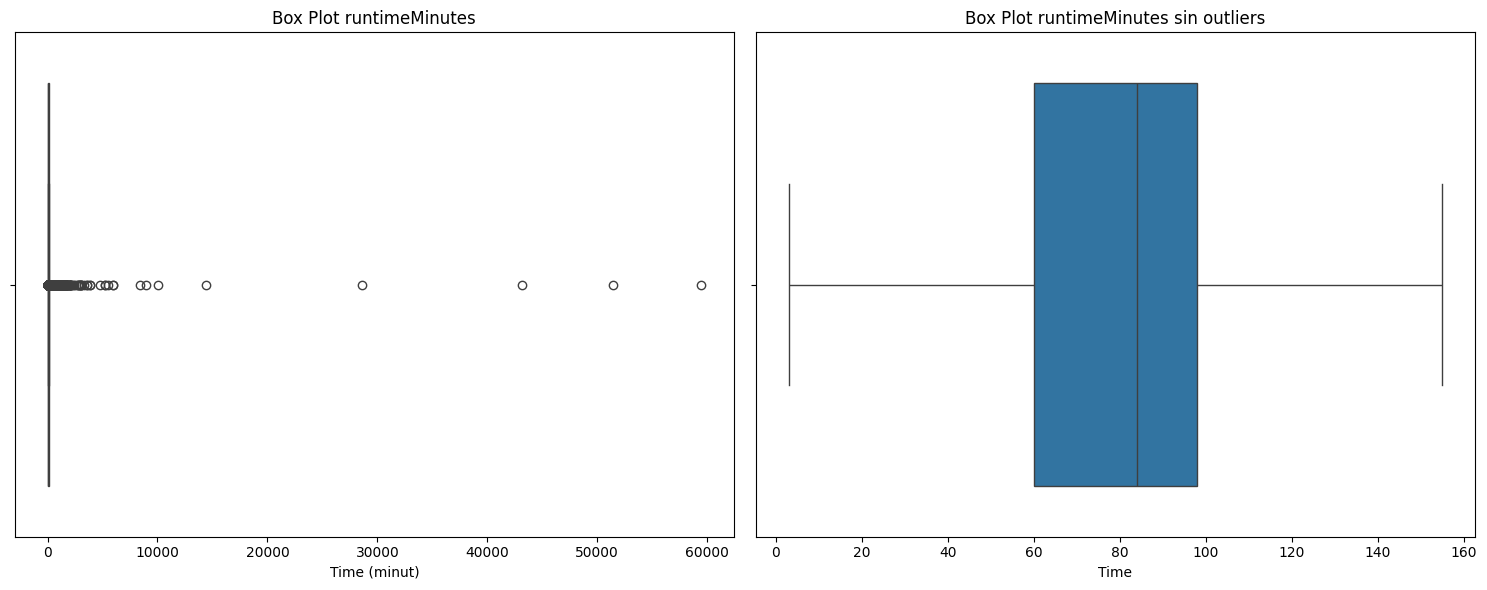

In [19]:
  #Eliminar los outliers
primer_cuartil = df_title_basics["runtimeMinutes"].quantile(0.25)
tercer_cuartil = df_title_basics["runtimeMinutes"].quantile(0.75)
  # Calcula el rango intercuartílico (IQR)
IQR = tercer_cuartil - primer_cuartil
 #Calcula los límites para considerar los valores atípicos
limite_inferior = primer_cuartil - 1.5 * IQR
limite_superior = tercer_cuartil + 1.5 * IQR
 #Filtra los valores que están dentro de los límites
df_title_basics_limpio = df_title_basics[( df_title_basics["runtimeMinutes"] >= limite_inferior) & ( df_title_basics["runtimeMinutes"] <= limite_superior)]

fig, axes = plt.subplots(ncols=2, figsize=(15, 6))
sns.boxplot(x=df_title_basics['runtimeMinutes'], ax=axes[0])
axes[0].set_title('Box Plot runtimeMinutes')
axes[0].set_xlabel('Time (minut)')
sns.boxplot(x=df_title_basics['runtimeMinutes'],showfliers=False, ax=axes[1])
axes[1].set_title('Box Plot runtimeMinutes sin outliers')
axes[1].set_xlabel('Time')
# Ajustar el espaciado y mostrar los gráficos
plt.tight_layout()
plt.show()


En el primer boxplot, observamos películas con una duración en días. Si bien es cierto que existen registros de algunas películas con duraciones extremadamente largas, en muchos casos estos datos corresponden a cortometrajes repetidos. Esto podría afectar gravemente nuestro análisis, ya que distorsiona la información al incluir datos atípicos.

En el segundo boxplot, tenemos una distribución más coherente, donde las películas generalmente duran entre 1 hora y 1:30 horas, llegando hasta las 2 horas. Este rango es más representativo de las duraciones típicas de las películas y proporciona una base más sólida para el análisis.

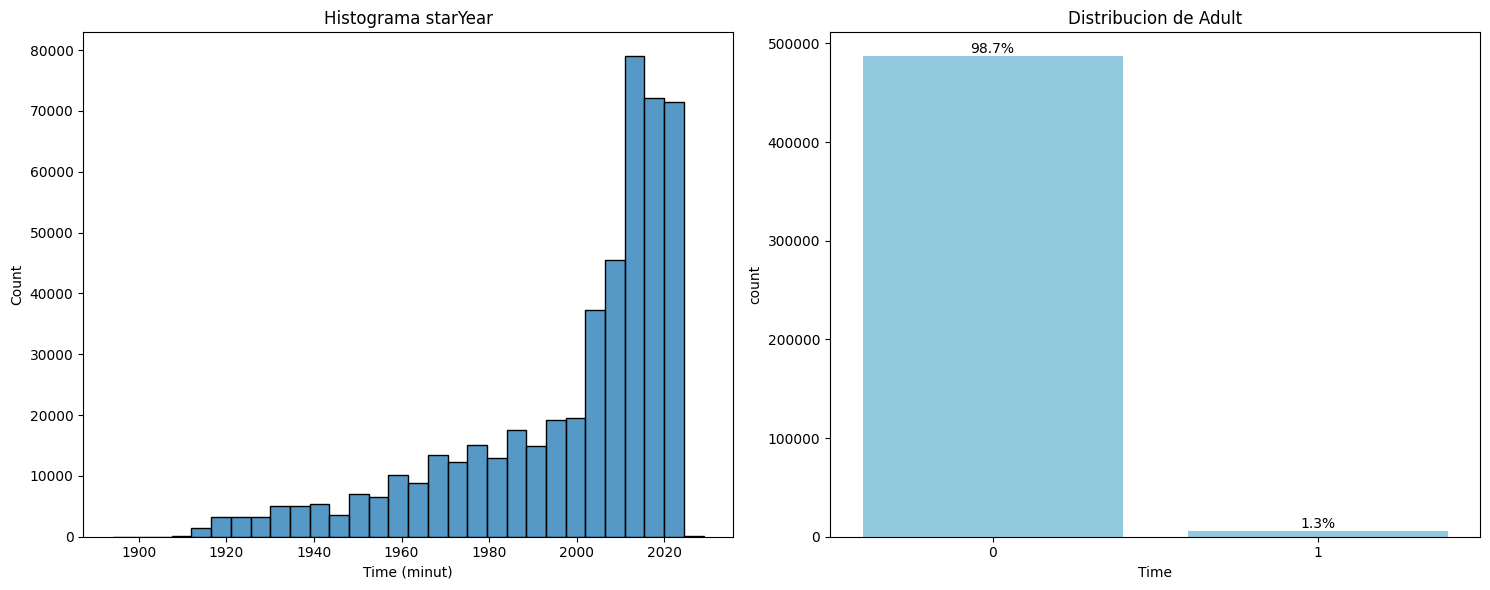

In [20]:
#@title
fig, axes = plt.subplots(ncols=2, figsize=(15, 6))
sns.histplot(x=df_title_basics['startYear'],bins=30, ax=axes[0])
axes[0].set_title('Histograma starYear')
axes[0].set_xlabel('Time (minut)')
sns.countplot(x=df_title_basics['isAdult'], ax=axes[1])
axes[1].set_title('Distribucion de Adult')
axes[1].set_xlabel('Time')
gen_cnt = df_title_basics['isAdult'].value_counts()
npkmn = gen_cnt.values.sum()
sns.countplot(x=df_title_basics['isAdult'], ax=axes[1],color="skyblue")
for i in range(len(gen_cnt)):
   cnt = gen_cnt[i]
   pcnt = '{:0.1f}%'.format(100*cnt/npkmn)
   plt.text(i, cnt, pcnt, va='bottom', ha='center')
# Ajustar el espaciado y mostrar los gráficos
plt.tight_layout()
plt.show()

Observamos que, a partir de los años 90, se produjo un aumento significativo en la cantidad de películas. Esto sugiere que sería más relevante enfocar nuestro análisis desde este punto en adelante, ya que refleja mejor los cambios tecnológicos y las preferencias del público en tiempos más recientes.

Además, la mayoría de las películas están adaptadas para todo público, representando un 98.7% del total. Esto indica una tendencia hacia la creación de contenido que sea accesible y atractivo para una audiencia amplia y diversa.

In [21]:
df_title_ratings.describe()

,averageRating,numVotes
count,1446041.00,1446041.00
mean,6.96,1032.07
std,1.38,17697.86
min,1.00,5.00
25%,6.20,11.00
50%,7.20,26.00
75%,7.90,101.00
max,10.00,2904305.00


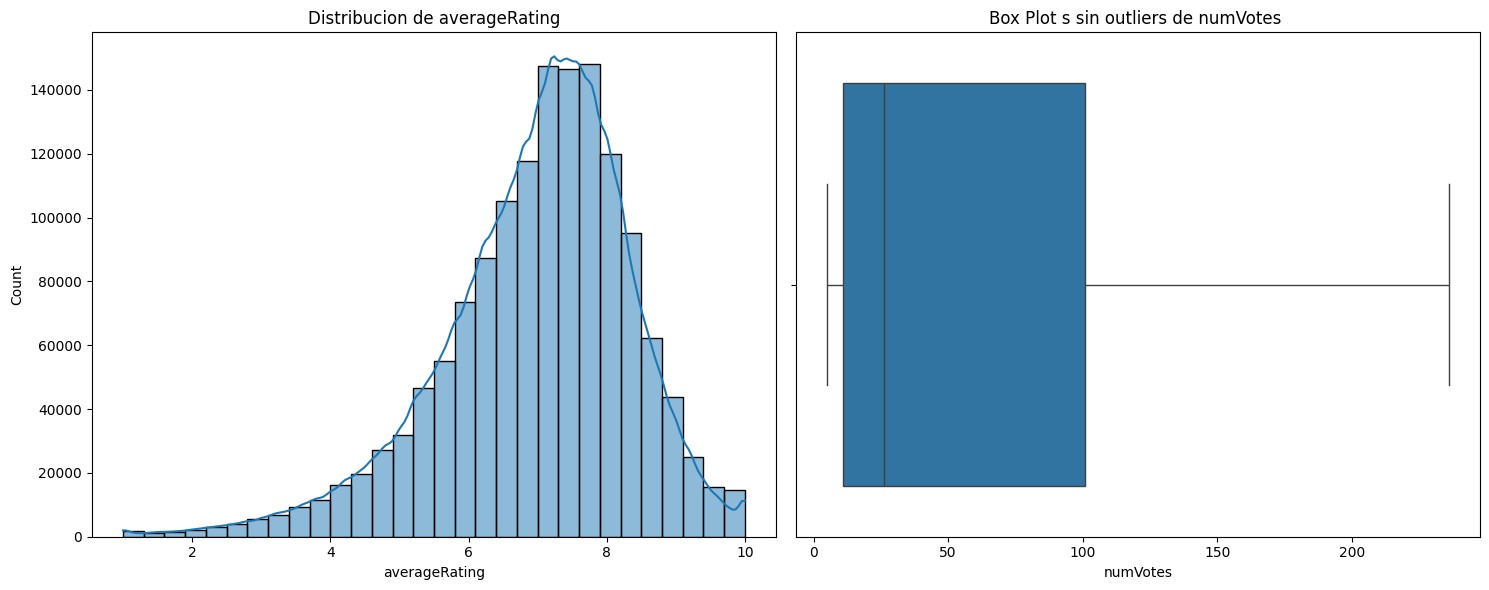

In [22]:
fig, axes = plt.subplots(ncols=2, figsize=(15, 6))
sns.histplot(x=df_title_ratings['averageRating'], ax=axes[0],bins=30,kde=True)
axes[0].set_title('Distribucion de averageRating')
axes[0].set_xlabel('averageRating')
sns.boxplot(x=df_title_ratings['numVotes'],showfliers=False, ax=axes[1])
axes[1].set_title('Box Plot s sin outliers de numVotes ')
axes[1].set_xlabel('numVotes')
# Ajustar el espaciado y mostrar los gráficos
plt.tight_layout()
plt.show()


Las usuarios tienden a dar puntajes que oscilan entre 5 y 8, con un máximo aproximado de 100 votos.

In [23]:
df_tmdb.describe()

,release_date,budget,revenue,vote_average,roi
count,9160,9160.00,9160.00,9160.00,9160.00
mean,2002-02-12 04:07:07.598253312,24874262.70,59237860.40,5.72,1.06
min,1914-04-25 00:00:00,1.00,1.00,0.00,-1.00
25%,1995-12-22 00:00:00,2500000.00,1500000.00,5.00,-0.42
50%,2007-03-30 00:00:00,10000000.00,11133849.00,6.00,0.49
75%,2014-09-05 00:00:00,30000000.00,50287672.25,6.00,2.00
max,2024-07-23 00:00:00,460000000.00,2800000000.00,10.00,7.60
std,NaN,38878837.30,141219501.60,1.58,1.93


In [24]:
df_tmdb.head()

,imdb_id,release_date,budget,revenue,genres,production_countries,vote_average,roi
0,tt1375666,2010-07-15,160000000,825532764,"Action, Science Fiction, Adventure","United Kingdom, United States of America",8,4.16
1,tt0816692,2014-11-05,165000000,701729206,"Adventure, Drama, Science Fiction","United Kingdom, United States of America",8,3.25
2,tt0468569,2008-07-16,185000000,1004558444,"Drama, Action, Crime, Thriller","United Kingdom, United States of America",8,4.43
4,tt0848228,2012-04-25,220000000,1518815515,"Science Fiction, Action, Adventure",United States of America,7,5.90
6,tt4154756,2018-04-25,300000000,2052415039,"Adventure, Action, Science Fiction",United States of America,8,5.84


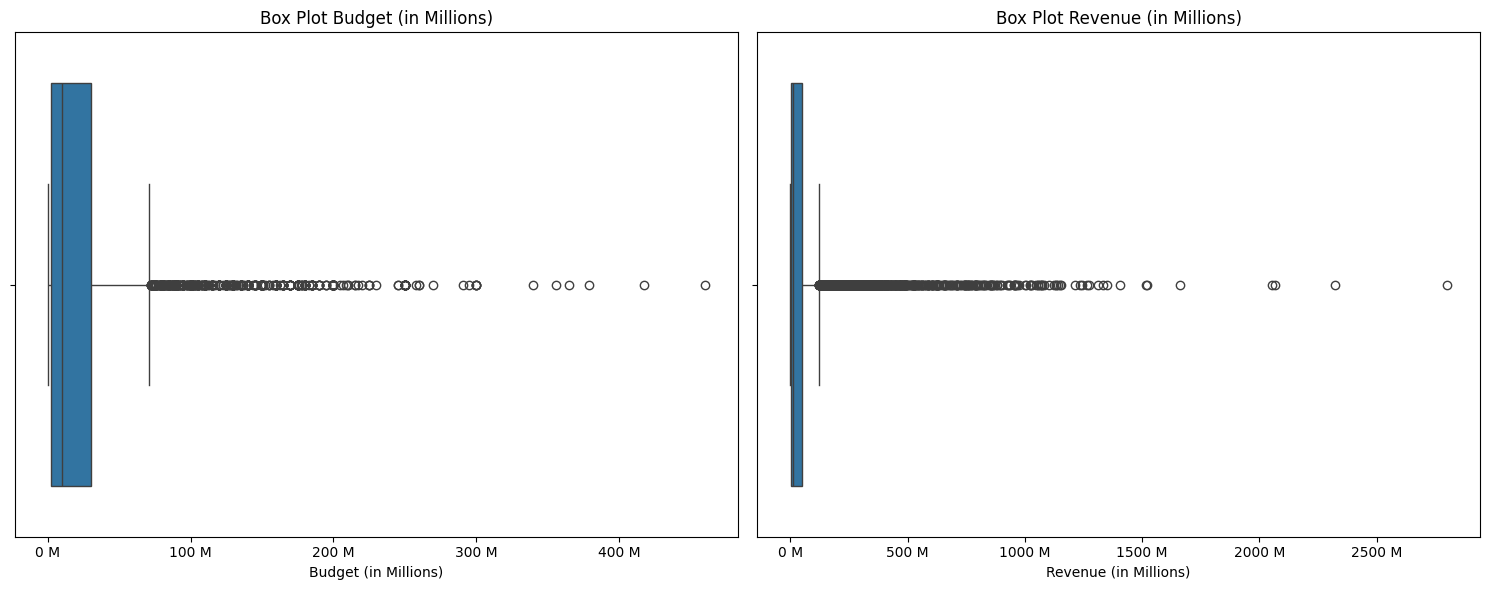

In [25]:

def millions_formatter(x, pos):
    return f'{x:.0f} M'

# Convertir la columna 'budget' y 'revenue' a millones
df_tmdb["budget_millions"] = df_tmdb["budget"] / 1000000
df_tmdb["revenue_millions"] = df_tmdb["revenue"] / 1000000

# Crear la figura y los subplots
fig, axes = plt.subplots(ncols=2, figsize=(15, 6))

# Boxplot para 'budget' en el primer subplot
sns.boxplot(x=df_tmdb['budget_millions'], ax=axes[0])
axes[0].set_title('Box Plot Budget (in Millions)')
axes[0].set_xlabel('Budget (in Millions)')
axes[0].xaxis.set_major_formatter(FuncFormatter(millions_formatter))
axes[0].set_ylabel('')


# Boxplot para 'revenue' en el segundo subplot
sns.boxplot(x=df_tmdb['revenue_millions'], ax=axes[1])
axes[1].set_title('Box Plot Revenue (in Millions)')
axes[1].set_xlabel('Revenue (in Millions)')
axes[1].xaxis.set_major_formatter(FuncFormatter(millions_formatter))
axes[1].set_ylabel('')


# Ajustar el espaciado y mostrar los gráficos
plt.tight_layout()
plt.show()


Algunas películas tienen costos de producción y ganancias demasiado elevados. Por ejemplo, 'Avatar' obtuvo ganancias significativas, pero también existen películas con presupuestos de producción muy altos. Es importante destacar que estos son casos específicos, ya que no todas las películas alcanzan ese nivel de éxito.

# **3. Preguntas y respuestas**


---




## **Pregunta 1: ¿Cual es la evolución del rating por tipo de contenido?**

In [28]:
df_movie.head()

startYear
1990   5.97
1991   6.05
1992   6.06
1993   6.02
1994   6.00
Name: averageRating, dtype: float64

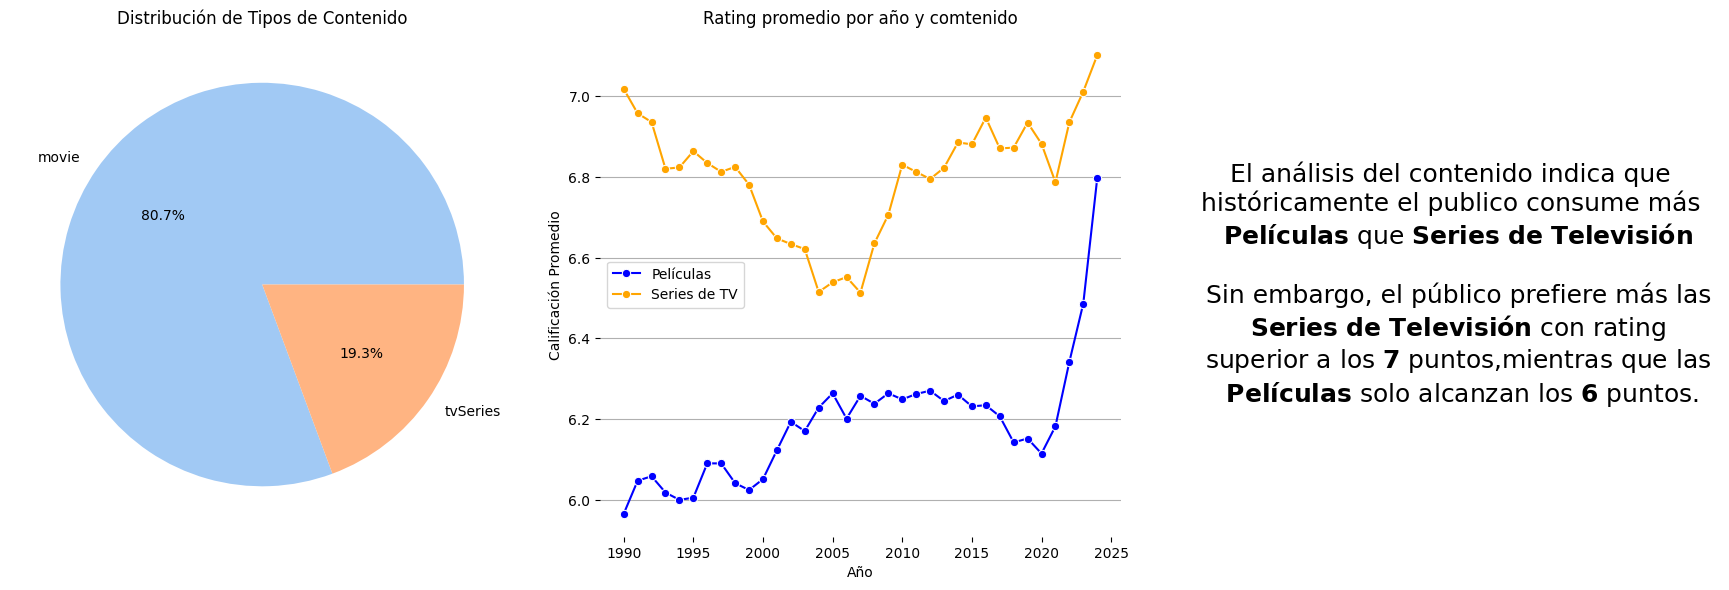

In [67]:

# Filtrar y preparar los datos
df_movie = df_title_basics[(df_title_basics["titleType"] == "movie") & (df_title_basics["startYear"] >= 1990)]
df_tv = df_title_basics[(df_title_basics["titleType"] == "tvSeries") & (df_title_basics["startYear"] >= 1990)]
df_movie = df_movie.merge(df_title_ratings, on="tconst").groupby('startYear')['averageRating'].mean()
df_tv = df_tv.merge(df_title_ratings, on="tconst").groupby('startYear')['averageRating'].mean()

# Preparar los datos para el gráfico de pastel
title_type_counts = df_title_basics['titleType'].value_counts()

# Crear la figura y los ejes con gridspec
fig = plt.figure(figsize=(18, 6))
gs = fig.add_gridspec(1, 3, width_ratios=[2, 2, 2])  # 3 columnas, con diferentes anchos

# Gráfico de pastel para la distribución de tipos de títulos
ax1 = fig.add_subplot(gs[0, 0])  # Primer subplot ocupa la primera columna
ax1.pie(title_type_counts, labels=title_type_counts.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
ax1.set_title('Distribución de Tipos de Contenido')

# Gráfico de líneas para películas y series de TV
ax2 = fig.add_subplot(gs[0, 1])  # Segundo subplot ocupa la segunda columna
sns.lineplot(data=df_movie, ax=ax2, label='Películas', marker='o', color='b')
sns.lineplot(data=df_tv, ax=ax2, label='Series de TV', marker='o', color='orange')
ax2.set_title('Rating promedio por año y comtenido')
ax2.set_xlabel('Año')
ax2.set_ylabel('Calificación Promedio')
ax2.grid(True, axis='y')
# Ajustar la leyenda
ax2.legend(loc='center left')

ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['bottom'].set_visible(False)

# Espacio para el texto
ax3 = fig.add_subplot(gs[0, 2])  # Tercer subplot ocupa la tercera columna
ax3.axis('off')  # Ocultar ejes para el área de texto
conclusion_text = (
    "El análisis del contenido indica que  \n"
    "históricamente el publico consume más  \n"
    "$\\bf{Películas}$ que $\\bf{Series\\ de\\ Televisión}$ \n\n"
    "Sin embargo, el público prefiere más las\n"
    "$\\bf{Series\\ de\\ Televisión}$ con rating \n"
    "superior a los $\\bf{7}$ puntos,mientras que las \n"
    " $\\bf{Películas}$ solo alcanzan los $\\bf{6}$ puntos."
)
ax3.text(0.5, 0.5, conclusion_text, ha="center",va="center", fontsize=18)



# Ajustar el espaciado entre los gráficos y el texto
fig.tight_layout()

# Mostrar los gráficos
plt.show()

## **Pregunta 2: ¿Cual es el rating promedio por género?**

In [30]:
df_title_basics_expanded = df_title_basics_limpio.assign(genre=df_title_basics['genres'].str.split(',')).explode('genre')


In [31]:
df_title_basics_expanded.head()

,tconst,titleType,originalTitle,isAdult,startYear,runtimeMinutes,genres,genre
0,tt0000009,movie,Miss Jerry,0,1894,45,Romance,Romance
1,tt0000147,movie,The Corbett-Fitzsimmons Fight,0,1897,100,"Documentary,News,Sport",Documentary
1,tt0000147,movie,The Corbett-Fitzsimmons Fight,0,1897,100,"Documentary,News,Sport",News
1,tt0000147,movie,The Corbett-Fitzsimmons Fight,0,1897,100,"Documentary,News,Sport",Sport
2,tt0000574,movie,The Story of the Kelly Gang,0,1906,70,"Action,Adventure,Biography",Action


In [32]:
agg_dict = {'averageRating': 'mean', 'tconst': 'count'}
df_merged = df_title_basics_expanded.merge(df_title_ratings,on='tconst')
df_genre_stats = df_merged.groupby('genre').agg(agg_dict).reset_index()

In [33]:
df_title_basics_expanded.head(2)

,tconst,titleType,originalTitle,isAdult,startYear,runtimeMinutes,genres,genre
0,tt0000009,movie,Miss Jerry,0,1894,45,Romance,Romance
1,tt0000147,movie,The Corbett-Fitzsimmons Fight,0,1897,100,"Documentary,News,Sport",Documentary


In [34]:
df_genre_stats = df_merged.groupby('genre').agg(agg_dict).reset_index()
df_genre_stats = df_genre_stats.sort_values(by='tconst', ascending=False)


In [35]:
df_title_basics_expanded.head(2)

,tconst,titleType,originalTitle,isAdult,startYear,runtimeMinutes,genres,genre
0,tt0000009,movie,Miss Jerry,0,1894,45,Romance,Romance
1,tt0000147,movie,The Corbett-Fitzsimmons Fight,0,1897,100,"Documentary,News,Sport",Documentary


In [36]:
df_title_basics_expanded[df_title_basics_expanded["runtimeMinutes"]>30000]

df_title_basics_expanded=df_title_basics_expanded[df_title_basics_expanded["startYear"]>1990]

<Axes: ylabel='runtimeMinutes'>

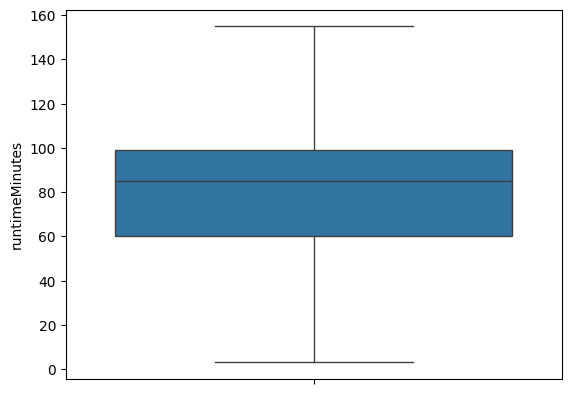

In [37]:
sns.boxplot(df_title_basics_expanded["runtimeMinutes"])

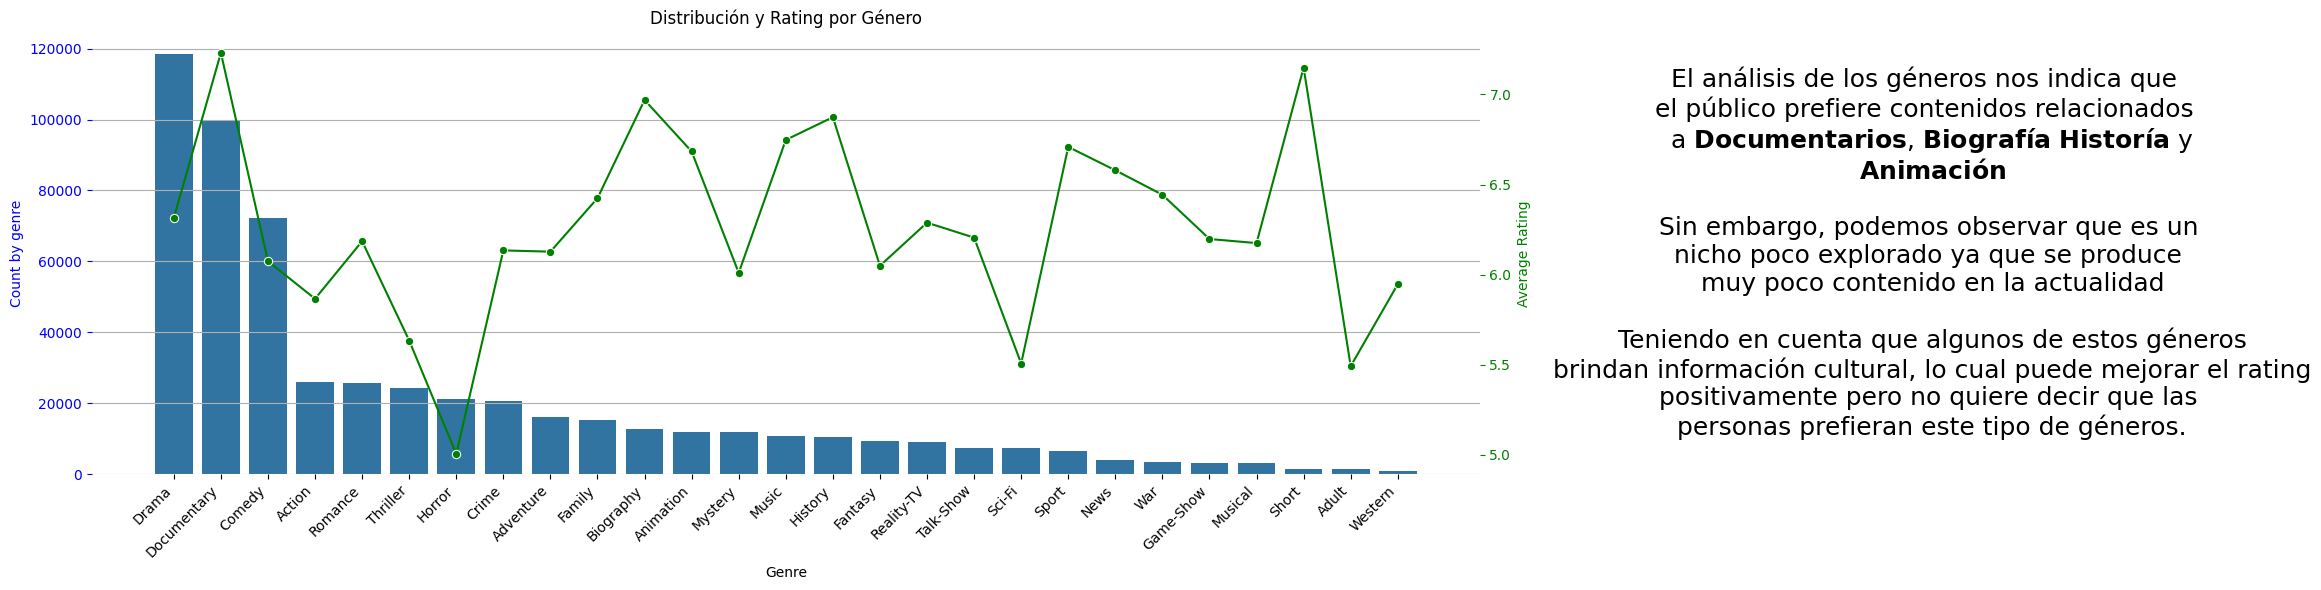

In [71]:

genre_order = df_title_basics_expanded['genre'].value_counts().index

# Crear la figura y los ejes
fig, ax1 = plt.subplots(figsize=(25, 6))
gs = fig.add_gridspec(1, 3, width_ratios=[2, 2, 2])

# Grafico de barras
sns.countplot(data=df_title_basics_expanded, x='genre', ax=ax1, order=genre_order)
ax1.set_title('Distribución y Rating por Género')
ax1.set_xlabel('Genre')  # Añadir etiqueta al eje x
ax1.set_ylabel('Count by genre', color="blue")  # Añadir etiqueta al eje y izquierdo
ax1.tick_params(axis='y', colors='blue')  # Ajustar color de los ticks del eje y
ax1.grid(True, axis='y')
for spine in ax1.spines.values():
    spine.set_visible(False)  # Ocultar los bordes de ax1

# Ajustar etiquetas del eje x
# Ajustar etiquetas del eje x con FixedLocator y FixedFormatter
ax1.set_xticks(range(len(genre_order)))
ax1.set_xticklabels(genre_order, rotation=45, ha='right')   # Rotar 45 grados y alinear a la derecha

# Crear un segundo eje y graficar el rating promedio
ax2 = ax1.twinx()

# Asegurarse de que los géneros en df_genre_stats estén en el mismo orden que en el gráfico de barras
df_genre_stats = df_genre_stats.set_index('genre').loc[genre_order].reset_index()

sns.lineplot(data=df_genre_stats, x='genre', y='averageRating', ax=ax2, color='g', marker='o')
ax2.set_ylabel('Average Rating', color="green")  # Añadir etiqueta al eje y derecho
for spine in ax2.spines.values():
    spine.set_visible(False)

# Ajustar las etiquetas del gráfico
ax2.set_xlabel(None)  # No mostrar etiqueta en el eje x del segundo gráfico
#ax1.tick_params(axis='y', colors='blue')
ax2.tick_params(axis='y', colors='green')

# Espacio para el texto
ax2 = fig.add_subplot(gs[0, 2])  # Tercer subplot ocupa la tercera columna
ax2.axis('off')  # Ocultar ejes para el área de texto
conclusion_text = (
    "El análisis de los géneros nos indica que  \n"
    "el público prefiere contenidos relacionados  \n"
    "a $\\bf{Documentarios}$, $\\bf{Biografía}$ $\\bf{Historía}$ y \n"
    "$\\bf{Animación}$\n\n"
    "Sin embargo, podemos observar que es un \n"
    "nicho poco explorado ya que se produce \n"
    "muy poco contenido en la actualidad\n\n"
    "Teniendo en cuenta que algunos de estos géneros\n"
    "brindan información cultural, lo cual puede mejorar el rating\n"
    "positivamente pero no quiere decir que las \n"
    "personas prefieran este tipo de géneros."
)
ax2.text(2.0, 0.5, conclusion_text, ha="center",va="center", fontsize=18)


# Ajustar el espaciado entre los subplots
plt.tight_layout()



# Mostrar el gráfico
plt.show()

##**Pregunta 3: ¿Cuáles son los géneros que proporcionan mayor ROI?**

In [39]:
df_tmdb=df_tmdb[df_tmdb['release_date'].dt.year.between(1990,2024)]
df_tmdb=df_tmdb[(df_tmdb['budget']>500000) & (df_tmdb['revenue']>500000)]
df_tmdb_expanded = df_tmdb.assign(genre=df_tmdb['genres'].str.split(',').explode('genre').str.strip()).explode('genre')
df_tmdb_expanded['genre'].value_counts()

genre
Drama              730
Comedy             626
Action             589
Thriller           489
Adventure          469
Crime              293
Science Fiction    273
Fantasy            270
Romance            244
Family             240
Horror             180
Mystery            160
Animation          143
History             79
War                 56
Music               40
Western             15
Documentary          4
TV Movie             2
Name: count, dtype: int64

In [40]:
generos_pocos_valores = ['Documentary', 'Western', 'Music', 'War', 'History','TV Movie']
df_tmdb_expanded = df_tmdb_expanded[~df_tmdb_expanded['genre'].isin(generos_pocos_valores)]

In [41]:
df_genre_roi = df_tmdb_expanded.groupby('genre')["roi"].mean().sort_values(ascending=False).iloc[:10].reset_index()


In [42]:
df_genre_roi

,genre,roi
0,Science Fiction,1.82
1,Family,1.63
2,Fantasy,1.63
3,Adventure,1.58
4,Action,1.49
5,Crime,1.25
6,Thriller,1.24
7,Animation,1.21
8,Mystery,1.18
9,Horror,1.12


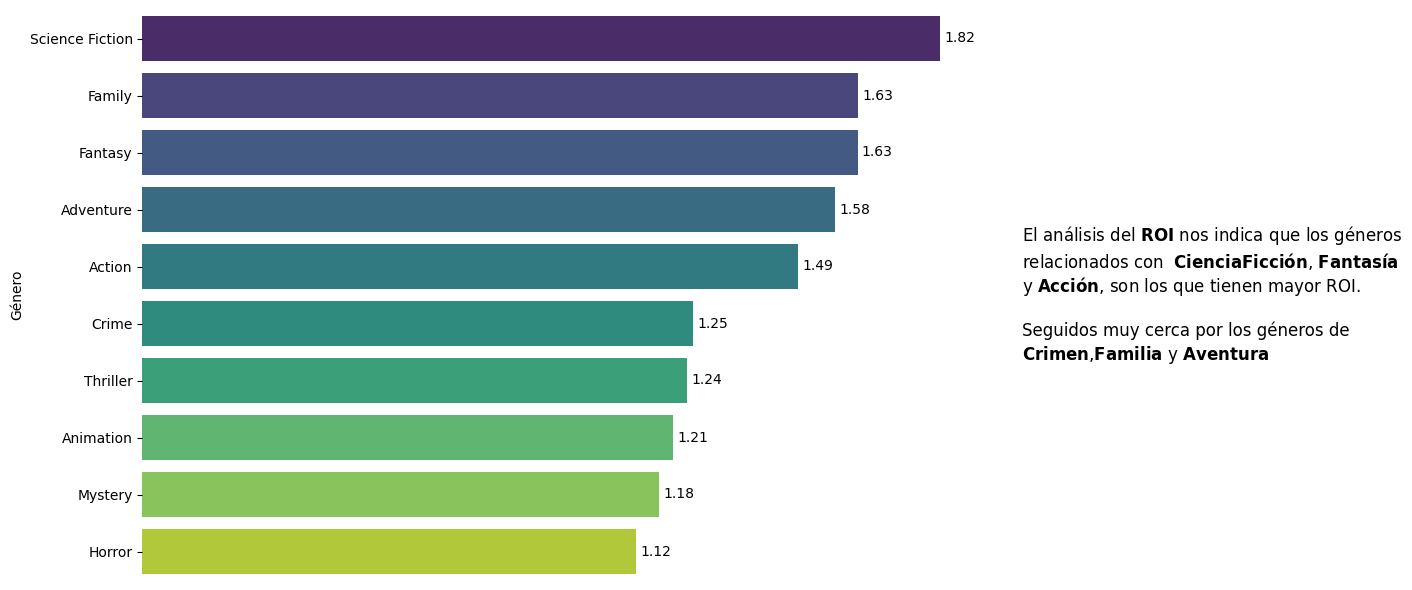

In [43]:
# Crear la figura y el gráfico
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x='roi', y='genre', data=df_genre_roi,hue='genre', palette='viridis', dodge=False, ax=ax,legend=False)

# Añadir etiquetas con el promedio de ROI al final de cada barra
for index, row in df_genre_roi.iterrows():
    ax.text(row['roi'] + 0.01, index, f'{row["roi"]:.2f}', ha='left', va='center', fontsize=10, color='black')

# Quitar la cuadrícula (grid) y los contornos de las barras
ax.grid(False)
sns.despine(ax=ax, left=True, bottom=True)

# Configuraciones adicionales
ax.set_xlabel('ROI')
ax.set_ylabel('Género')
ax.set_title('Ranking Top 10 Géneros con mayor ROI', fontsize=18, pad=40)

# Añadir el texto a la derecha del gráfico
conclusion_text = (
    "El análisis del $\\bf{ROI}$ nos indica que los géneros\n"
    "relacionados con  $\\bf{Ciencia Ficción}$, $\\bf{Fantasía}$ \n"
    "y $\\bf{Acción}$, son los que tienen mayor ROI. \n\n"
    "Seguidos muy cerca por los géneros de\n"
    "$\\bf{Crimen}$,$\\bf{Familia}$ y $\\bf{Aventura}$"
)
fig.text(1.05, 0.5, conclusion_text, ha="left", va="center", fontsize=12, transform=ax.transAxes)
# Quitar títulos y etiquetas del eje x
ax.set_title('')
ax.set_xlabel('')
ax.set_xticks([])
# Ajustar el diseño para que se vea bien
plt.tight_layout()
plt.show()


##**Pregunta 4: ¿Cuáles son los países con mayor producción de contenido?**

In [44]:
df_tmdb.head(1)

,imdb_id,release_date,budget,revenue,genres,production_countries,vote_average,roi,budget_millions,revenue_millions
0,tt1375666,2010-07-15,160000000,825532764,"Action, Science Fiction, Adventure","United Kingdom, United States of America",8,4.16,160.00,825.53


In [45]:
df_tmdb_exploded_countries = df_tmdb.assign(production_countries=df_tmdb['production_countries'].str.split(',')).explode('production_countries').copy()
df_tmdb_exploded_countries['production_countries'] = df_tmdb_exploded_countries['production_countries'].str.strip()
df_plot = df_tmdb_exploded_countries.groupby('production_countries').agg({'roi': 'mean', 'production_countries': 'count'})
df_plot.rename(columns={'production_countries': 'count'}, inplace=True)
df_plot = df_plot.sort_values(by=['count'])
df_plot = df_plot.iloc[-13:]
num_countries = len(df_plot)
grid_size = int(np.ceil(np.sqrt(num_countries)))
df_plot['x'] = np.tile(np.arange(grid_size), grid_size)[:num_countries]
df_plot['y'] = np.repeat(np.arange(grid_size), grid_size)[:num_countries]
df_plot

,roi,count,x,y
production_countries,,,,
Belgium,0.19,118,0,0
Australia,1.12,125,1,0
Italy,0.35,146,2,0
China,1.26,148,3,0
Russia,0.77,156,0,1
Japan,1.20,167,1,1
Spain,0.80,172,2,1
Canada,0.91,355,3,1
Germany,0.76,424,0,2


In [46]:
import plotly.express as px
# Crear el gráfico de dispersión
fig = px.scatter(
    df_plot, x='x', y='y',
    size='count', color='roi',
    text=df_plot.index,
    color_continuous_scale='blues',
    size_max=110,
    custom_data=['roi'],
    hover_data={
        'roi': True, 'count': False,
        'x': False, 'y': False
    }
)

fig.update_traces(hovertemplate='%{text}<br>ROI: %{customdata[0]:.2f}')

fig.update_layout(
    plot_bgcolor='white',
    paper_bgcolor='white',
    xaxis=dict(
        showgrid=False, zeroline=False, showticklabels=False, title=''
    ),
    yaxis=dict(
        showgrid=False, zeroline=False, showticklabels=False, title=''
    ),
    title={
        'text': 'Países con mayor producción de contenido',
        'x': 0.5,
        'y': 0.95,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': {'size': 24}
    },
    width=750,
    height=650
)


fig.show()


Estados Unidos lidera la producción de contenido, lo que refleja su fuerte industria del entretenimiento. Otros países como Alemania, India, Francia y el Reino Unido también tienen una notable producción de contenido, aunque en menor escala.

De los cuales, India, Japón, Australia, China tienen un alto porcentaje de ROI

# 5. ¿Cual es tu recomendación para el cliente?

In [47]:

df_tmdb_titles.head()

,imdb_id,title,release_date,budget,revenue,genres,production_countries,vote_average
0,tt1375666,Inception,2010-07-15,160000000,825532764,"Action, Science Fiction, Adventure","United Kingdom, United States of America",8
1,tt0816692,Interstellar,2014-11-05,165000000,701729206,"Adventure, Drama, Science Fiction","United Kingdom, United States of America",8
2,tt0468569,The Dark Knight,2008-07-16,185000000,1004558444,"Drama, Action, Crime, Thriller","United Kingdom, United States of America",8
3,tt0499549,Avatar,2009-12-15,237000000,2923706026,"Action, Adventure, Fantasy, Science Fiction","United States of America, United Kingdom",7
4,tt0848228,The Avengers,2012-04-25,220000000,1518815515,"Science Fiction, Action, Adventure",United States of America,7


In [48]:
avatar=df_tmdb_titles[df_tmdb_titles["imdb_id"]=="tt0499549"]
endgame=df_tmdb_titles[df_tmdb_titles["imdb_id"]=="tt4154796"]
avatar_sentido_del_agua=df_tmdb_titles[df_tmdb_titles["imdb_id"]=="tt1630029"]
spiderman=df_tmdb_titles[df_tmdb_titles["imdb_id"]=="tt10872600"]
jurassic_world=df_tmdb_titles[df_tmdb_titles["imdb_id"]=="tt0369610"]

films=pd.concat([avatar,endgame,avatar_sentido_del_agua,spiderman,jurassic_world])[['title','revenue']]
#films["revenue"]=(films["revenue"]/1000000000).apply(lambda x:f'${x:.2f}B')
films

,title,revenue
3,Avatar,2923706026
15,Avengers: Endgame,2800000000
282,Avatar: The Way of Water,2320250281
57,Spider-Man: No Way Home,1921847111
44,Jurassic World,1671537444


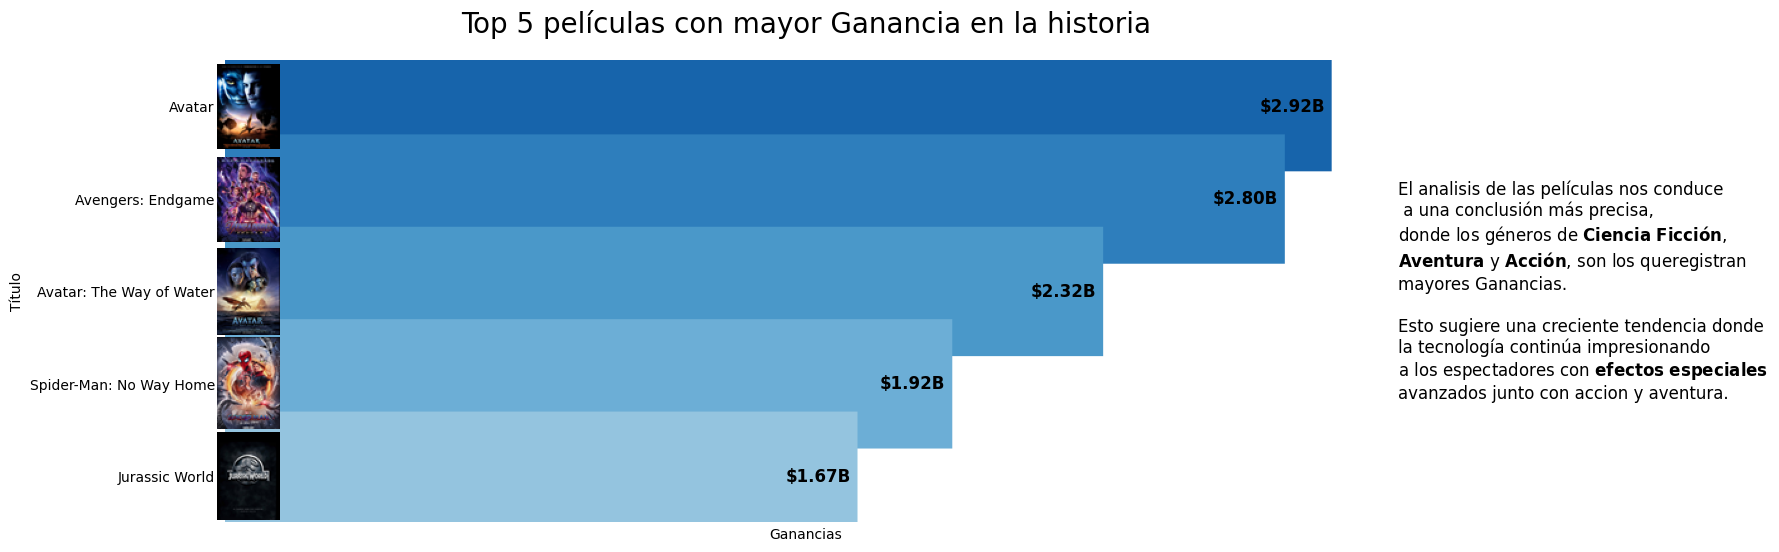

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.patches import FancyBboxPatch
import requests
from io import BytesIO
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
# URLs de las imágenes
def billions_formatter(x, pos):
    return f"${x/1e9:.2f}B"

imagenes_paths = [
    'https://i.postimg.cc/HnTBG1Nf/Avatar.png',
    'https://i.postimg.cc/xd6nW9qz/avengers.png',
    'https://i.postimg.cc/Y9kMP86h/avatar-agua.png',
    'https://i.postimg.cc/mDbNrf3R/spiderman.png',
    'https://i.postimg.cc/7PgZ3zNh/jurassic.png'

]

# Generar la gráfica
plt.subplots(figsize=(15, 6))

# Crear una paleta de colores para cada barra
num_bars = len(films['revenue'])
colores_azules = plt.cm.Blues_r(np.linspace(0.2, 0.6, num_bars))

# Convertir la paleta en una lista para evitar advertencias
colores_azules = list(colores_azules)

# Plot con seaborn, asignando 'y' como hue y deshabilitando la leyenda
ax = sns.barplot(x=films['revenue'], y=films['title'], hue=films['title'], palette=colores_azules, orient='h', dodge=False, legend=False)

new_patches = []

for patch, color, title, revenue, image_path in zip(ax.patches, colores_azules, films['title'], films['revenue'], imagenes_paths):
    bb = patch.get_bbox()
    p_bbox = FancyBboxPatch((bb.xmin, bb.ymin),
                            abs(bb.width), abs(bb.height),
                            boxstyle="round,pad=1,rounding_size=-5",
                            ec="none", fc=color,
                            mutation_aspect=0.3
                            )
    patch.remove()
    new_patches.append(p_bbox)

    # Añadir imagen a la barra
    response = requests.get(image_path)
    image = plt.imread(BytesIO(response.content))
    imagebox = OffsetImage(image, zoom=0.9)
    ab = AnnotationBbox(imagebox, xy=(bb.xmin + 100, patch.get_y() + patch.get_height() / 2),
                        xybox=(17, 0), xycoords="data", boxcoords="offset points",
                        pad=0, arrowprops=dict(arrowstyle='-', color='none'),
                        bboxprops=dict(facecolor='none', edgecolor='none'))

    ax.add_artist(ab)

    # Añadir texto presupuesto a la derecha de la barra
    ax.annotate(billions_formatter(revenue, None), xy=(patch.get_width(), patch.get_y() + patch.get_height() / 2),
                xytext=(-5, 0), textcoords='offset points',
                color='black', fontweight='bold', fontsize=12, ha='right', va='center',
                xycoords='data',
                bbox=dict(facecolor='none', edgecolor='none', pad=0),
                annotation_clip=False)

for patch in new_patches:
    ax.add_patch(patch)

# Agregar conclusión a la derecha del gráfico
conclusion_text = (
    "El analisis de las películas nos conduce\n"
    " a una conclusión más precisa,\n"
    "donde los géneros de $\\bf{Ciencia\\ Ficción}$, \n"
    "$\\bf{Aventura}$ y $\\bf{Acción}$, son los queregistran \n"
    "mayores Ganancias.\n\n"
    "Esto sugiere una creciente tendencia donde \n"
    "la tecnología continúa impresionando\n"
    "a los espectadores con $\\bf{efectos\\ especiales}$ \n"
    "avanzados junto con accion y aventura."
)


ax.text(3100000000, 2, conclusion_text, fontsize=12, va='center', ha='left')

# Personalizando el gráfico
ax.set_title("Top 5 películas con mayor Ganancia en la historia", loc="center", fontdict={"fontsize":20}, pad=20)
ax.set_xlabel("Ganancias")
ax.set_ylabel("Título")
ax.xaxis.grid(False)
ax.yaxis.grid(False)
ax.set_xticks([])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
sns.despine(left=True, bottom=True)

plt.show()




In [50]:


# Definir los datos de las series
data = {
    'title': [
        'Breaking Bad',
        'Game of Thrones',
        'Stranger Things',
        'The Crown',
        'The Mandalorian'
    ],
    'rating': [
        9.4,
        9.3,
        8.7,
        8.7,
        8.8
    ]
}

# Crear el DataFrame
df_series = pd.DataFrame(data)

# Mostrar el DataFrame
df_series=df_series.sort_values(by='rating',ascending=False)
df_series

,title,rating
0,Breaking Bad,9.40
1,Game of Thrones,9.30
4,The Mandalorian,8.80
2,Stranger Things,8.70
3,The Crown,8.70


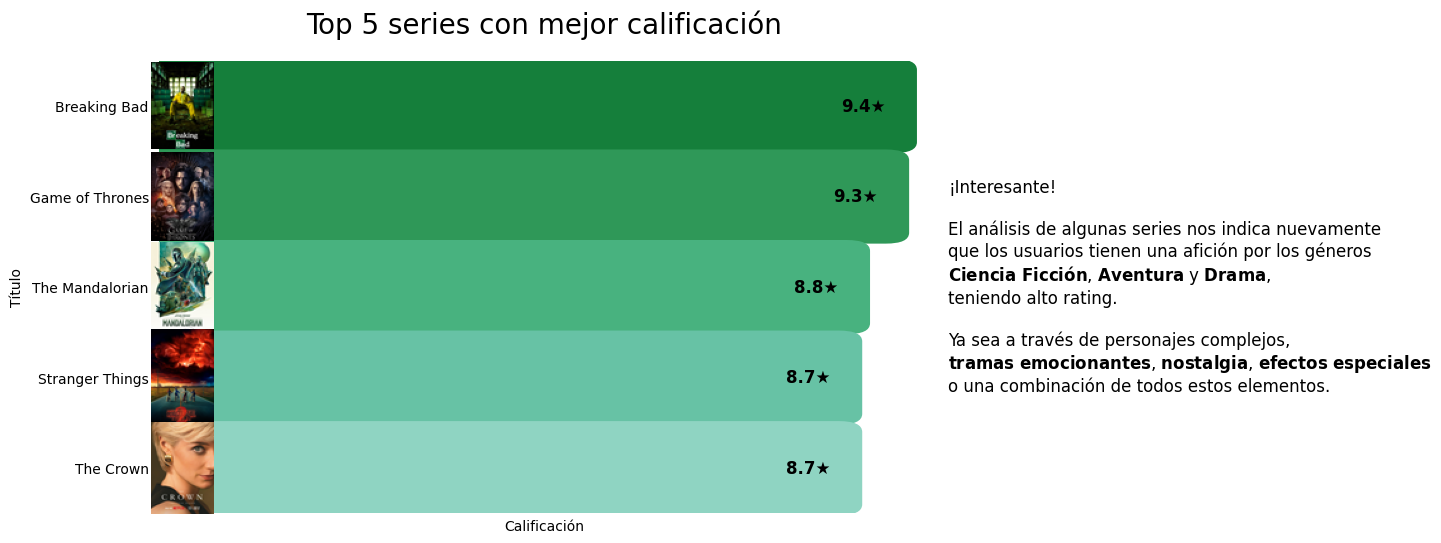

In [66]:

# URLs de las imágenes correspondientes a cada serie
imagenes_paths = [
    'https://i.postimg.cc/x1ZzRxrw/breaking.png',
    'https://i.postimg.cc/85Qr87zw/games.png',
    'https://i.postimg.cc/Hxw8TTJm/themandalorian.png',
    'https://i.postimg.cc/Pq88FWTP/stranger.png',
    'https://i.postimg.cc/sgxW5FLP/thecrown.png'
]
# Generar la gráfica
plt.subplots(figsize=(15, 6))

# Crear una paleta de colores para cada barra
num_bars = len(df_series['rating'])
colores_azules = plt.cm.BuGn_r(np.linspace(0.2, 0.6, num_bars))

# Convertir la paleta en una lista para evitar advertencias
colores_azules = list(colores_azules)

# Plot con seaborn, asignando 'y' como hue y deshabilitando la leyenda
ax = sns.barplot(x=df_series['rating'], y=df_series['title'], hue=df_series['title'], palette=colores_azules, orient='h', dodge=False, legend=False)

# Ajustar las barras para que se ajusten al contenido
#ax.set_xlim(15, 20)  # Establecer límites para ajustar el espacio de las barras

new_patches = []

for patch, color, title, rating, image_path in zip(ax.patches, colores_azules, df_series['title'], df_series['rating'], imagenes_paths):
    bb = patch.get_bbox()
    p_bbox = FancyBboxPatch((bb.xmin, bb.ymin),
                            abs(bb.width), abs(bb.height),
                            boxstyle="round", #le damos el redondeo a las graficas
                            ec="none", fc=color,
                            mutation_aspect=0.4
                            )
    patch.remove()
    new_patches.append(p_bbox)

    # Añadir imagen a la barra
    response = requests.get(image_path)
    image = plt.imread(BytesIO(response.content))
    imagebox = OffsetImage(image, zoom=0.9)  # Ajustar el zoom de la imagen
    ab = AnnotationBbox(imagebox, xy=(0.3, patch.get_y() + patch.get_height() / 2),#la etiqueda de adentro
                        xybox=(0, 0), xycoords="data", boxcoords="offset points",
                        pad=0, arrowprops=dict(arrowstyle='-', color='none'),
                        bboxprops=dict(facecolor='none', edgecolor='none'))

    ax.add_artist(ab)

    # Añadir texto de calificación a la derecha de la barra
    ax.annotate(f'{rating}★', xy=(patch.get_width(), patch.get_y() + patch.get_height() / 2),#ponemos la posicion de la imagen
                xytext=(-6, 0), textcoords='offset points',
                color='black', fontweight='bold', fontsize=12, ha='right', va='center',
                xycoords='data',
                bbox=dict(facecolor='none', edgecolor='none', pad=0),
                annotation_clip=False)

for patch in new_patches:
    ax.add_patch(patch)

# Agregar conclusión a la derecha del gráfico
conclusion_text = (
    "¡Interesante!\n\n"
    "El análisis de algunas series nos indica nuevamente\n"
    "que los usuarios tienen una afición por los géneros\n"
    "$\\bf{Ciencia\\ Ficción}$, $\\bf{Aventura}$ y $\\bf{Drama}$,\n"
    "teniendo alto rating.\n\n"
    "Ya sea a través de personajes complejos,\n"
    "$\\bf{tramas\\ emocionantes}$, $\\bf{nostalgia}$, $\\bf{efectos\\ especiales}$\n"
    "o una combinación de todos estos elementos."
)


ax.text(10.1, 2, conclusion_text, fontsize=12, va='center', ha='left')

# Personalizando el gráfico
ax.set_title("Top 5 series con mejor calificación", loc="center", fontdict={"fontsize":20}, pad=20)
ax.set_xlabel("Calificación")
ax.set_ylabel("Título")
ax.xaxis.grid(False)
ax.yaxis.grid(False)
ax.set_xticks([])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
sns.despine(left=True, bottom=True)

plt.tight_layout()  # Ajustar el diseño del gráfico para mejorar la visualización de elementos
plt.show()


# Conclusión:

El análisis global sugiere que los géneros de drama, aventura y ciencia ficción son altamente valorados, tanto en series como en películas. Además, aunque las películas siguen dominando en términos de cantidad, las series de televisión están ganando terreno en términos de calidad y calificación del público. La industria del entretenimiento de Estados Unidos sigue siendo la más dominante a nivel mundial, con una considerable producción de contenido y un alto retorno sobre la inversión.

Este análisis proporciona información valiosa sobre las tendencias actuales en el consumo de entretenimiento y las preferencias del público, destacando la importancia de ciertos géneros y la evolución en la valoración de series de televisión sobre las películas.

Recomendaciones
1. Incorporación de Contenido con Alto Rating:

Industria de EE.UU.: Estados Unidos lidera en la producción de contenido. Atraer a la plataforma las series y películas con mejor rating provenientes de este país puede aumentar significativamente la satisfacción de los usuarios y la retención de suscriptores.

2. Foco en Géneros Populares:

Géneros Clave: Ciencia Ficción, Aventura, Acción, Drama, Fantasía y Terror son los géneros que generan mayor visualización. Enfocar la adquisición y promoción de contenido en estos géneros atraerá a más clientes y aumentará el tiempo de visualización.

3. Explotación de Contenido Clásico:

Contenido Clásico: Películas y series clásicas que, aunque no sean recientes, siguen siendo populares debido a la nostalgia y el entretenimiento que proporcionan. Promover estos títulos puede atraer a una audiencia más amplia y diversificada.

4. Inversión en Nuevas Producciones:

Nuevas Películas y Series: Invertir en la creación de nuevas películas y series enfocadas en Ciencia Ficción, Aventura y Drama, o una combinación de estos, puede capturar la atención de una audiencia ávida de contenido fresco y
emocionante.

5. Acuerdos con Productoras:

Contratos de Contenido: Identificar títulos con calificaciones positivas que no están disponibles en la plataforma y negociar acuerdos con las productoras para financiar y asegurar la exclusividad de estos títulos. Esto puede diferenciar la plataforma de la competencia y ofrecer contenido exclusivo de alta calidad.

6. Mejora Continua:

Análisis Regular: Continuar analizando las tendencias y las preferencias del público para adaptar la estrategia de contenido de manera dinámica y proactiva. Esto permitirá mantener la relevancia y la competitividad en el mercado del entretenimiento en constante evolución.

Implementar estas recomendaciones ayudará a maximizar el atractivo de la plataforma, mejorar la experiencia del usuario y aumentar la base de suscriptores, garantizando así el éxito a largo plazo en un mercado altamente competitivo.





